<a href="https://colab.research.google.com/github/zudinaanfisa/mySchool/blob/main/leukimia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import callbacks
import cv2 
import os
import pandas as pd

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [ ]:
!wget https://www.dropbox.com/s/f64cvlhm0gp80v5/tuberculosis.zip?dl=1 -O tuberculosis.zip
!unzip tuberculosis.zip

--2022-10-09 19:06:53--  https://www.dropbox.com/s/f64cvlhm0gp80v5/tuberculosis.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/f64cvlhm0gp80v5/tuberculosis.zip [following]
--2022-10-09 19:06:53--  https://www.dropbox.com/s/dl/f64cvlhm0gp80v5/tuberculosis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucccb22dbbb8cd036e9bea386505.dl.dropboxusercontent.com/cd/0/get/Buj5E-vSEDQUCm2J58sQSiGXoFHEZqvJ5R5-BjKOpb93AAdrrzLwialnjiAR_w8iYd38TILYKgU62LUoK0Fv5iStrN4ro-4Jar369zfXwqrpDRpAvOMSSqc-Bgas9CefjhSKxPRB6ONT9pFrWboHi1KmsVxCkUMTq5kD7KJJAbeViA/file?dl=1# [following]
--2022-10-09 19:06:54--  https://ucccb22dbbb8cd036e9bea386505.dl.dropboxusercontent.com/cd/0/get/Buj5E-vSEDQUCm2J58sQSiGXoFHEZqvJ5R5-BjKOpb93AAdrrzLwialnjiAR_w8iYd

In [ ]:
img_size = (300, 300)

def make_nparray(data):
  data = np.array(data)
  np.random.shuffle(data)
  X = np.array([i[0] for i in data])
  y = np.array([i[1] for i in data])
  return X, y

def get_img(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  if len(img.shape) > 2:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      return img

In [ ]:
n_classes = 2

In [ ]:
train_dir = os.path.abspath('base_dir/train_dir')
normal_path = os.path.join(train_dir, 'Normal')
bad_path = os.path.join(train_dir, 'Tuberculosis')
normal_data = [[os.path.join(normal_path, img), [1, 0]] for img in os.listdir(normal_path)]
bad_data = [[os.path.join(bad_path, img), [0, 1]] for img in os.listdir(bad_path)]

data = normal_data + bad_data
print('Len list with images = ', len(data))
for i in range(len(data)):
  data[i][0] = get_img(data[i][0]) 

X_train, y_train = make_nparray(data)
X_train = np.array([cv2.resize(img, img_size) for img in X_train])

split = len(data)
data = [[i[0], 0] if i[1][0] == 1 else [i[0], 1] for i in data]
dtf_train = pd.DataFrame(data, columns=['img', 'label'])

Len list with images =  680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
X_train.shape, y_train.shape

((680, 300, 300, 3), (680, 2))

In [ ]:
test_dir = os.path.abspath('base_dir/val_dir')
normal_path = os.path.join(test_dir, 'Normal')
bad_path = os.path.join(test_dir, 'Tuberculosis')
normal_data = [[os.path.join(normal_path, img), 0] for img in os.listdir(normal_path)]
bad_data = [[os.path.join(bad_path, img), 1] for img in os.listdir(bad_path)]

data = normal_data + bad_data
print('Len list with images = ', len(data))
for i in range(len(data)):
  data[i][0] = get_img(data[i][0]) 

X_test, y_test = make_nparray(data)
X_test = np.array([cv2.resize(img, img_size) for img in X_test])

dtf_test = pd.DataFrame(data, columns=['img', 'label'])

Len list with images =  120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


In [ ]:
y_prob = []
for i in y_test:
  a = [0, 0]
  a[i] = 1
  y_prob.append(a)
y_prob = np.array(y_prob)
y_prob.shape

(120, 2)

In [ ]:
X_test.shape, y_test.shape

((120, 300, 300, 3), (120,))

------
label =  1


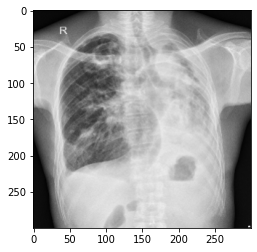

------
label =  1


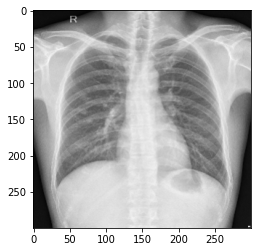

------
label =  1


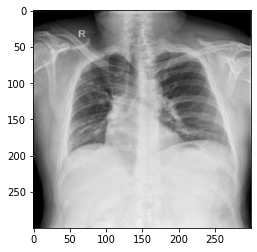

------
label =  1


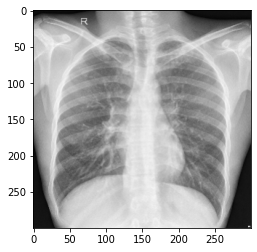

------
label =  0


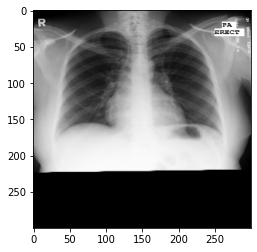

In [ ]:
for img, label in zip(X_test[:5], y_test[:5]):
  print('------')
  print('label = ', label)
  plt.imshow(img)
  plt.show()

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout

model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(300, 300, 3)),
    layers.Rescaling(1./255),
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(299, 299,1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2,  activation='softmax')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
training = model.fit(x=X_train, y=y_train,
                     epochs=15, batch_size=32, shuffle=True, verbose=1, validation_split=0.2,
                     callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])
model = training.model

Epoch 1/15
17/17 [==============================] - 165s 10s/step - loss: 0.4963 - accuracy: 0.8088 - val_loss: 0.5150 - val_accuracy: 0.8015
Epoch 2/15
17/17 [==============================] - 168s 10s/step - loss: 0.4638 - accuracy: 0.8088 - val_loss: 0.5066 - val_accuracy: 0.8088
Epoch 3/15
17/17 [==============================] - 162s 10s/step - loss: 0.4505 - accuracy: 0.8143 - val_loss: 0.5588 - val_accuracy: 0.7941
Epoch 4/15
17/17 [==============================] - 166s 10s/step - loss: 0.4232 - accuracy: 0.8346 - val_loss: 0.4885 - val_accuracy: 0.8015
Epoch 5/15
17/17 [==============================] - 162s 10s/step - loss: 0.4105 - accuracy: 0.8346 - val_loss: 0.4745 - val_accuracy: 0.8015
Epoch 6/15
17/17 [==============================] - 163s 10s/step - loss: 0.3797 - accuracy: 0.8566 - val_loss: 0.4977 - val_accuracy: 0.7794
Epoch 7/15
17/17 [==============================] - 165s 10s/step - loss: 0.3812 - accuracy: 0.8658 - val_loss: 0.5043 - val_accuracy: 0.7574
Epoch 

In [ ]:
'''
Plot loss and metrics model training.
'''
def utils_plot_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Обучение")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], "o-", color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], "o-", label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Валидация")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], "o-", color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], "o-", label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

'''
Evaluates a model performance.
:parameter
    :param y_test: array
    :param predicted: array
    :param predicted_prob: array
    :param figsize: tuple - plot setting
'''
def evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5)):
    classes = np.unique(y_test)
    y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, predicted)
    # auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
    print("Результаты обучения")
    print("Accuracy:",  round(accuracy,2))
    # print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
    
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Purples, cbar=False)
    ax.set(xlabel="Predict", ylabel="Fact", xticklabels=classes, yticklabels=classes, title="Tuberc Predicitions Confusion matrix")
    plt.yticks(rotation=0)

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ## Plot roc
    for i in range(n_classes):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, label='{0} (S={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)))
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)
    
    ## Plot precision-recall curve
    for i in range(n_classes):
        precision, recall, thresholds = metrics.precision_recall_curve(y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, label='{0} (area={1:0.2f})'.format(
            classes[i], metrics.auc(recall, precision)))
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()

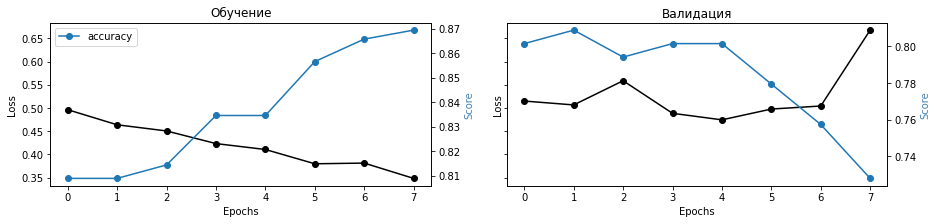

In [ ]:
utils_plot_training(training)

Результаты обучения
Accuracy: 0.74
Detail:
              precision    recall  f1-score   support

           0       0.84      0.61      0.70        61
           1       0.68      0.88      0.77        59

    accuracy                           0.74       120
   macro avg       0.76      0.74      0.74       120
weighted avg       0.76      0.74      0.74       120



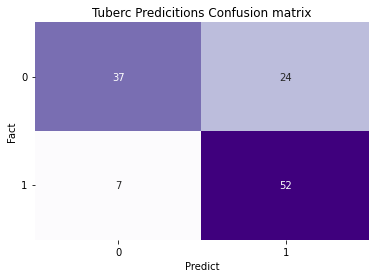

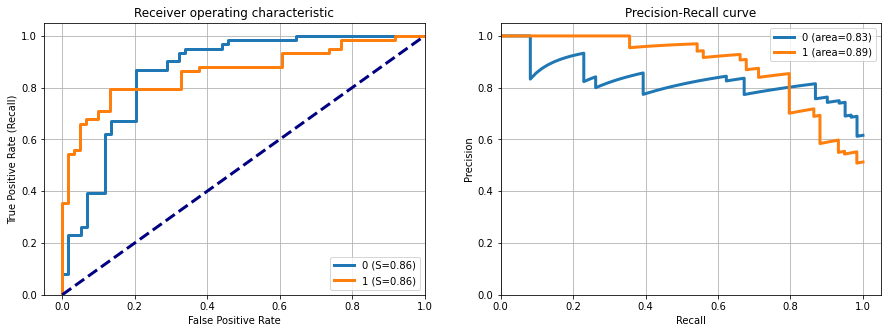

In [ ]:
predicted_prob = model.predict(X_test)
predicted = [np.argmax(pred) for pred in predicted_prob]

evaluate_multi_classif(y_test, predicted, predicted_prob, figsize=(15,5))